### Bank Data Analysis - Financial Ratios

### Input source data - US Banks Financial Quarterly Ratios 2001-2023
### Source data URL - https://www.kaggle.com/datasets/neutrino404/all-us-banks-financial-quarterly-ratios-2001-2023

In [3]:
## Python Libraries referenced

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
## Create dataframe from downloaded .csv file

df = pd.read_csv('data/total_bank_data.csv')

In [5]:
## Identify df columns with at least one NaN value

columns_with_nan = df.columns[df.isna().any()].tolist()
print(f"Columns with at least one NaN value: {columns_with_nan}")

Columns with at least one NaN value: ['CBLRIND', 'CBLRINDQ', 'DDTR', 'ELNATQR', 'ELNLOSQ', 'NTRIPCR', 'NTRR', 'NTTOTQ', 'ROE', 'TRNIPCOCR', 'TRNR', 'TSR', 'EEFF', 'EEFFQ', 'EEFFQR', 'IEFF', 'IEFFQ', 'NTCONQR', 'NTRSMMDAR', 'NTRSOTHR', 'RBCT1CER', 'ROAPTXQ', 'ROAQ', 'ROEQ', 'RWAJ', 'STNAME']


In [6]:
## drop columsn_with_nan and create df_cl (cleaned version of df)
## No row is dropped as it will result in loss of banks as each row corrseponds to a bank

df_cl = df.drop(columns_with_nan, axis = 1)
print(df.shape)
print(df_cl.shape)

(656438, 796)
(656438, 770)


In [7]:
## Select QUARTER ending with 2023-06-30
## The df_20230630 will be used to perform the PCA and K-Means Clustering

df_20230630_all = df_cl.query("REPDTE == 20230630")
print(df_20230630_all.shape)

(4714, 770)


In [8]:
### Consider ALL banks for analysis
df_20230630 = df_20230630_all

In [9]:
column_list = df_20230630.columns.tolist()
print(column_list)

['ABCUBKR', 'ABCUOTHR', 'ABCXBKR', 'ABCXOTHR', 'ADDNONINTEXPQR', 'ADDNONINTEXPR', 'ALLOTHLR', 'ASCEOTHR', 'ASCERESR', 'ASDROTHR', 'ASDRRESR', 'ASSTLTR', 'AVASSETJR', 'BKPREMR', 'BROINSR', 'BROR', 'CD1T3R', 'CD1T3SR', 'CD3LESR', 'CD3LESSR', 'CD3T12R', 'CD3T12SR', 'CDOV3R', 'CDOV3SR', 'CERT', 'CHBALIR', 'CHBALNIR', 'CHBALR', 'CHCICR', 'CHCOINR', 'CHFRBR', 'CHITEMR', 'CHUSR', 'COREDEPR', 'CRAGQR', 'CRAGR', 'CRAGSMQR', 'CRAGSMR', 'CRAUTOQR', 'CRAUTOR', 'CRCINUSQR', 'CRCINUSR', 'CRCIQR', 'CRCIR', 'CRCONOTHR', 'CRCONOTQR', 'CRCONQR', 'CRCONR', 'CRCRCDQR', 'CRCRCDR', 'CRDEPNUQR', 'CRDEPNUSR', 'CRDEPQR', 'CRDEPR', 'CRFORGVQR', 'CRFORGVR', 'CRLNLSQR', 'CRLNLSR', 'CRLSQR', 'CRLSR', 'DEPDOMR', 'DEPFORR', 'DEPIFORR', 'DEPIPCCFR', 'DEPNIFORR', 'DEPR', 'DRLNLSQR', 'DRLNLSR', 'EAMINTANR', 'EAMINTQR', 'EDEPDOMQR', 'EDEPDOMR', 'EDEPFORQR', 'EDEPFORR', 'EFREPPQR', 'EFREPPR', 'EINTEXPR', 'EINTXQR', 'ELNATRR', 'EOTHNINQR', 'EOTHNINTR', 'EPREMAGGR', 'EPREMAGQR', 'EQCDIVCR', 'EQCDIVPR', 'EQCDIVQR', 'EQCDIVR

#### DROP Columns 'CERT', 'REPDTE', 'REPYEAR' as they can be a source of noise for the financial ratio data
#### The CERT ids are available in cert_df_20230630 which has the same index values as the resulting dataframe
#### after dropping the three columns

In [11]:
df_20230630_sel = df_20230630.drop(['CERT', 'REPDTE', 'REPYEAR'], axis = 1)
print(df_20230630_sel.shape)

(4714, 767)


#### DROP Non-Numeric Columns

In [13]:
non_num_columns = df_20230630_sel.select_dtypes(exclude='number').columns.tolist()
print(non_num_columns)

df_20230630_num = df_20230630_sel.drop(non_num_columns, axis = 1)
print(df_20230630_num.shape)

['NAME']
(4714, 766)


In [14]:
df_non_num = df_20230630_sel[non_num_columns]
print(df_non_num.head())

                           NAME
0                     ERGO BANK
1           WOODFORD STATE BANK
2           PORTAGE COUNTY BANK
3                 SECURITY BANK
4  NATIONAL EXCHANGE BANK&TRUST


#### Normalize the financial ratio columns
#### by subtrating the mean and then dividing by the standard deviation

In [16]:
mu = df_20230630_num.mean()
sigma = df_20230630_num.std()
df_norm = (df_20230630_num - mu) / sigma
print(df_norm.shape)
df_norm.describe()


(4714, 766)


,ABCUBKR,ABCUOTHR,ABCXBKR,ABCXOTHR,ADDNONINTEXPQR,ADDNONINTEXPR,ALLOTHLR,ASCEOTHR,ASCERESR,ASDROTHR,...,UCCOMRESR,UCCOMREUR,UCCRCDR,UCLOCR,UCOTHERR,UCOVER1R,UCR,UCSCR,UNINCFORR,VOLIABR
count,4.714000e+03,4.714000e+03,4.714000e+03,4.714000e+03,4.714000e+03,4714.000000,4.714000e+03,4.714000e+03,4714.000000,4.714000e+03,...,4.714000e+03,4.714000e+03,4.714000e+03,4.714000e+03,0.0,4.714000e+03,4.714000e+03,4.714000e+03,4714.000000,4.714000e+03
mean,-1.507303e-18,-9.043819e-18,-1.507303e-18,-1.055112e-17,9.043819e-18,0.000000,-1.205843e-17,-7.159690e-18,0.000000,2.260955e-18,...,-2.411685e-17,2.336320e-17,-6.029213e-18,-4.823370e-17,NaN,-2.411685e-17,-6.029213e-18,7.536516e-19,0.000000,1.484694e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-2.051950e-02,-1.456482e-02,-2.047604e-02,-1.456482e-02,-1.074630e+00,-1.196502,-2.707437e-01,-4.338762e-02,-0.058019,-4.035236e-02,...,-8.906526e-01,-1.497366e-01,-2.472750e-02,-6.949179e-01,NaN,-6.247954e-01,-5.462471e-02,-1.574427e-02,-0.016352,-1.343718e+00
25%,-2.051950e-02,-1.456482e-02,-2.047604e-02,-1.456482e-02,-1.053058e-01,-0.105788,-1.989619e-01,-4.338762e-02,-0.058019,-4.035236e-02,...,-7.252889e-01,-1.497366e-01,-2.472750e-02,-6.949179e-01,NaN,-6.247954e-01,-3.924796e-02,-1.574427e-02,-0.016352,-7.100755e-01
50%,-2.051950e-02,-1.456482e-02,-2.047604e-02,-1.456482e-02,-8.799196e-02,-0.087956,-1.439304e-01,-4.338762e-02,-0.058019,-4.035236e-02,...,-2.752075e-01,-1.497366e-01,-2.472750e-02,-3.810443e-01,NaN,-6.226626e-01,-2.765769e-02,-1.574427e-02,-0.016352,-1.614845e-01
75%,-2.051950e-02,-1.456482e-02,-2.047604e-02,-1.456482e-02,-6.509715e-02,-0.065188,-5.320688e-02,-4.338762e-02,-0.058019,-4.035236e-02,...,4.192897e-01,-1.497366e-01,-2.472750e-02,3.404346e-01,NaN,3.567886e-01,-1.317130e-02,-1.574427e-02,-0.016352,4.908824e-01
max,5.263006e+01,6.864401e+01,5.355800e+01,6.864401e+01,3.509752e+01,36.736506,2.052104e+01,3.797501e+01,45.685300,5.027997e+01,...,1.377175e+01,2.192595e+01,6.081821e+01,1.625902e+01,NaN,1.210729e+01,6.080968e+01,6.839827e+01,68.370355,8.326827e+00


#### The Normaization process can create NaN values when the Standard Deviation is 0 thus resulting in division by 0
#### List and DROP all such columns with NaN values created as a result of the Normalization process

In [18]:
## check for NaN columns in norm
columns_with_nan1 = df_norm.columns[df_norm.isna().any()].tolist()
print(columns_with_nan1)

## DROP NaN columns from norm (NaN possibly due to division by zero)

df_norm_cl = df_norm.drop(columns_with_nan1, axis = 1)
print(df_norm_cl.shape)

['CRDEPNUQR', 'CRDEPNUSR', 'CRDEPQR', 'CRDEPR', 'CRFORGVQR', 'CRFORGVR', 'LIABEQR', 'SCASPNSUMR', 'DEPCSBQR', 'DRDEPNUQR', 'DRDEPNUSR', 'DRDEPQR', 'DRDEPR', 'DRFORGVQR', 'DRFORGVR', 'LAGR', 'LCIR', 'LCONR', 'LOREGTYR', 'LSAOAR', 'LSASCDBTR', 'NALAGR', 'NALCIR', 'NALCONR', 'NALREAGR', 'NTDEPNUQR', 'NTDEPNUSQ', 'NTDEPNUSR', 'NTDEPQR', 'NTDEPR', 'NTFORGVQR', 'NTFORGVR', 'OREINVR', 'P3FGR', 'P3LAGR', 'P3LCIR', 'P3LCONR', 'P3LREAGR', 'P3LTOTR', 'ASSETR', 'AVMMLFR', 'MMLFBALR', 'P9FGR', 'P9LAGR', 'P9LCIR', 'P9LCONR', 'P9LREAGR', 'P9LRECONR', 'P9LREMULR', 'P9LRENRSR', 'P9LRERESR', 'PARTCONVR', 'PPPLF1LSR', 'PPPLFOV1R', 'SZ30CIR', 'SZ90CIR', 'SZCRCIR', 'SZCRCRCDR', 'SZDRCIR', 'SZISLCCDR', 'SZISLCONR', 'UCOTHERR']
(4714, 704)


#### The dataframe df_norm_cl is used for the Bank Data analysis

#### STEP 1 - Paerform Principal Component Analysis (PCA)
#### Perform Singular Value Decomposition (SVD)

In [21]:
## PERFORM SINGULAR VALUE DECOMPOSITION (SVD)

from scipy.linalg import svd
U, s, Vt = svd(df_norm_cl, full_matrices=True)
Sigma = np.diag(s)
V = Vt.T

#### Convert matrices U, Sigma and V to DataFrames

In [23]:
print(df_norm_cl.shape)

U_df = pd.DataFrame(U)
print(U_df.shape)

Sigma_df = pd.DataFrame(Sigma)
print(Sigma_df.shape)

V_df = pd.DataFrame(V)
print(V_df.shape)

(4714, 704)
(4714, 4714)
(704, 704)
(704, 704)


#### Plot Sigma vs Column Index (representing the descending order of signifcance)

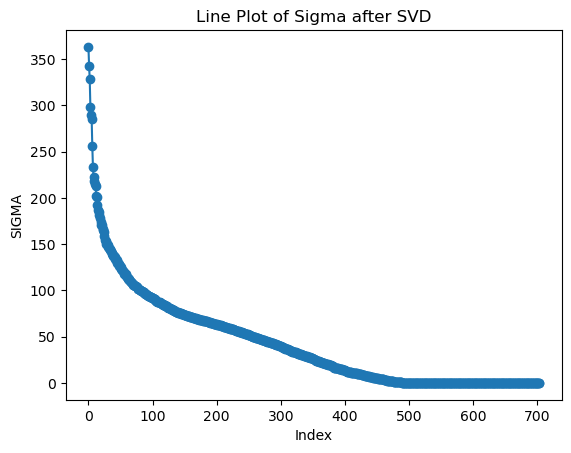

In [25]:
plt.plot(s, marker='o')

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('SIGMA')
plt.title('Line Plot of Sigma after SVD')

plt.show()

In [26]:
!pip install kneed

In [27]:
from kneed import KneeLocator

sigma_values = np.diag(Sigma)

# Create the scree plot
x = np.arange(1, len(sigma_values) + 1)
y = sigma_values

# Locate the elbow point
knee = KneeLocator(x, y, curve='convex', direction='decreasing')
elbow_point = knee.knee

print("Elbow point index:", elbow_point)


Elbow point index: 57


#### As Elbow point index is 57, r is set to 58

In [29]:
## Significant Principal Components is r = elbow_point + 1 = 29

r = elbow_point + 1

Ur = U[:, :r]
Sigmar = Sigma[:r, :r]

df_norm_rr = pd.DataFrame(Ur @ Sigmar)


In [30]:
print(df_norm_rr)

            0         1         2         3         4         5         6   \
0     2.789044  0.410270  0.643679  1.211461 -1.079692 -0.333062  2.944148   
1     1.575698 -0.924356  0.201754  0.992043 -0.463891 -0.082761  1.130689   
2     0.178082 -1.782877 -0.010455 -0.079538  0.065481  0.225162  0.734875   
3     2.940142  0.998245  1.004150  0.893789 -2.395703 -1.041115  2.569710   
4    -0.472484 -0.368090 -0.018047 -1.579724 -0.839112 -0.325160 -0.424461   
...        ...       ...       ...       ...       ...       ...       ...   
4709 -2.298682 -2.347063  0.368637 -1.380460  3.553436  2.267664  2.009955   
4710  1.259242 -1.730120 -0.395067  1.070331 -1.323405 -0.818346 -1.330847   
4711  1.672224 -0.344562  0.673673  0.118421 -0.502429 -0.070306  0.530901   
4712 -3.571634 -3.565382 -0.662257 -1.629726  3.460143  2.001803  0.069780   
4713  2.451076  1.007267  1.098025  0.872863 -1.397179 -0.421625  3.643342   

            7         8         9   ...        48        49    

#### STEP 2 - Perform K-Means Clustering

In [32]:
import sklearn.cluster as cluster

#### SET Number of clusters = 4

In [34]:
kmeans = cluster.KMeans(n_clusters=4, init='random')
kmeans.fit(df_norm_rr)

kmeans.labels_

array([1, 1, 2, ..., 1, 2, 1])

In [35]:
df_norm_rr_all = pd.concat([df_non_num['NAME'].reset_index(), df_20230630['CERT'].reset_index(), df_norm_rr], axis=1, ignore_index = True)
#print(df_norm_rr_all)
klabels_df = pd.DataFrame(kmeans.labels_)
print(klabels_df.shape)
bank_cluster_df = pd.concat([klabels_df.reset_index(), df_norm_rr_all], axis=1, ignore_index = True)

(4714, 1)


In [36]:
print(bank_cluster_df.head())

   0   1   2                             3   4      5         6         7   \
0   0   1   0                     ERGO BANK   0  10004  2.789044  0.410270   
1   1   1   1           WOODFORD STATE BANK   1  10011  1.575698 -0.924356   
2   2   2   2           PORTAGE COUNTY BANK   2  10012  0.178082 -1.782877   
3   3   1   3                 SECURITY BANK   3  10015  2.940142  0.998245   
4   4   1   4  NATIONAL EXCHANGE BANK&TRUST   4  10044 -0.472484 -0.368090   

         8         9   ...        54        55        56        57        58  \
0  0.643679  1.211461  ... -0.183317  0.794597  0.371557 -0.037422  0.609750   
1  0.201754  0.992043  ...  0.393626 -0.424875 -1.106595 -0.394815  0.463196   
2 -0.010455 -0.079538  ...  0.686668 -0.289820 -0.124365 -0.648340  0.245568   
3  1.004150  0.893789  ...  0.841317 -0.103726 -0.595889 -0.872561  0.631687   
4 -0.018047 -1.579724  ... -0.761501 -0.237244 -0.726780 -1.058055 -0.111108   

         59        60        61        62        6

In [37]:
bank_label_df = bank_cluster_df.iloc[:, [1, 3, 5]]

bank_label_df.columns = ['label', 'bankname', 'CERT']

# Print the new DataFrame
print(bank_label_df)

      label                      bankname   CERT
0         1                     ERGO BANK  10004
1         1           WOODFORD STATE BANK  10011
2         2           PORTAGE COUNTY BANK  10012
3         1                 SECURITY BANK  10015
4         1  NATIONAL EXCHANGE BANK&TRUST  10044
...     ...                           ...    ...
4709      2  FARMERS&MERCHANTS BK CRAIG C   9986
4710      1       JEFFERSON SECURITY BANK   9997
4711      1             CAPON VALLEY BANK   9998
4712      2       G W JONES EXCHANGE BANK    999
4713      1               BANK OF DELIGHT     99

[4714 rows x 3 columns]


#### Select Label 0 (Cluster #0) banks

In [108]:
label_0_df = bank_label_df.query("label == 0")
print(label_0_df.shape)

(32, 3)


#### Select Label 1 (Cluster #1) banks

In [110]:
label_1_df = bank_label_df.query("label == 1")
print(label_1_df.shape)

(2414, 3)


#### Select Label 2 (Cluster #2) banks

In [112]:
label_2_df = bank_label_df.query("label == 2")
print(label_2_df.shape)

(2181, 3)


#### Select Label 3 (Cluster #3) banks

In [114]:
label_3_df = bank_label_df.query("label == 3")
print(label_3_df.shape)

(87, 3)


In [46]:
failed_banks_df = pd.read_csv("data/failed-banks-data.csv")
print(failed_banks_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Bank Name               571 non-null    object
 1   City                    571 non-null    object
 2   State                   571 non-null    object
 3   CERT                    571 non-null    int64 
 4   Acquiring Institution   571 non-null    object
 5   Closing Date            571 non-null    object
 6   Fund                    571 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 31.4+ KB
None


In [116]:
check_df = pd.merge(bank_label_df, failed_banks_df, on="CERT", how="inner")
print(check_df)

   label              bankname   CERT                             Bank Name   \
0      2         REPUBLIC BANK  27332  Republic First Bank dba Republic Bank   
1      1  PULASKI SAVINGS BANK  28611                   Pulaski Savings Bank   
2      1   FIRST NB OF LINDSAY   4134         First National Bank of Lindsay   
3      2         CITIZENS BANK   8758                          Citizens Bank   

          City  State              Acquiring Institution  Closing Date    Fund  
0  Philadelphia     PA  Fulton Bank, National Association     26-Apr-24  10546  
1       Chicago     IL                    Millennium Bank     17-Jan-25  10548  
2       Lindsay     OK             First Bank & Trust Co.     18-Oct-24  10547  
3      Sac City     IA          Iowa Trust & Savings Bank      3-Nov-23  10545  


#### There are two failed banks in cluster #2, which had not failed till 20230630 (the Quarter end of the processed Data)
#### However, these two banks (CERT=27332 and CERT=8758) failed within less than a year of 20230630
#### Similarly there are two failed banks in cluster #1, which had not failed till 20230630, however,
#### these two banks (CERT=28611 and CERT=4134) failed just over one year after 20230630

#### As a result it is reasonable to assume that cluster #2 is associated with significantly high financial risk, which without mitigation can lead to bank failure in immediate future. Cluster #2 is thus assigned RED color.

#### Similarly it is reasonable to assume that cluster #1 is associated with high financial risk, which without mitigation can lead to bank failure in near future.  Cluster #1 is thus assigned ORANGE color.

In [49]:
bank_label_df.to_csv('data/label_data_4_clusters.csv', index=False)

#### Upon inspection of the downloaded bank_label_df
#### There are 32 banks in cluster #0 that includes banks such as 
#### JPMORGAN CHASE BANK NA / CERT = 628
#### WELLS FARGO BANK NA / CERT = 3511
#### BANK OF AMERICA NA / CERT = 3510

#### All these banks are KNOWN to be highly stable, carrying very low financial risk
#### Hence it is reasonable to assume that cluster #0 is associated with highly stable and very low financial risk banks
#### The cluster #0 is assigned the BLUE color

#### The remaining cluster #3, which also does not have any of the failed banks is assumed to be one with medium financial risk
#### The cluster #3 is assigned the GREEN color

In [122]:
### STEP 3 - Create Classification Models

#### Create Logistic Regression Model based upon the labeled data created by clustering (n_clusters = 4)

#### set X as df_norm_cl (all numeric ratios after cleaning and normalization steps
#### set y = label column from bank_label_df

In [54]:
## Import Classification libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import auc as skl_auc
from sklearn.model_selection import train_test_split

In [55]:
## Set X and y for Logistic Regression
X = df_norm_cl
y = bank_label_df['label']

In [56]:
print(X.shape)
print(y.shape)

(4714, 704)
(4714,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [128]:
lgr = LogisticRegression(random_state=42, class_weight='balanced')
lgr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [130]:
y_pred_test = lgr.predict(X_test)

#### Compute Accuracy

In [133]:
lgr_acc = lgr.score(X_test, y_test)
print(f"Model Accuracy: {lgr_acc}")

Model Accuracy: 0.9728583545377438


#### Confusion Matrix

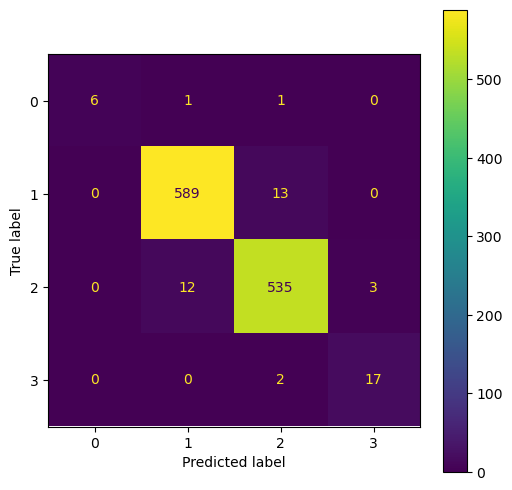

In [136]:
fig, ax = plt.subplots()
#fig, ax = plt.plot(1, 2)
fig.set_size_inches(6, 6)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp1 = ConfusionMatrixDisplay(conf_matrix)
disp1.plot(ax=ax)


#### Compute Recall

In [141]:
from sklearn.metrics import recall_score
lgr_recall = recall_score(y_test, y_pred_test, average='macro')
print(f"Model Recall: {lgr_recall}")

Model Recall: 0.8989673576117885


#### Determine SHAP values of the LinearRegression model lgr

In [144]:
import shap

In [146]:
# Create explainer
explainer = shap.Explainer(lgr, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Calculate mean absolute SHAP values for each feature
mean_shap_values = np.abs(shap_values.values).mean(axis=0).mean(axis=1)


# Create DataFrame
shap_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean SHAP Value': mean_shap_values
})

# Sort DataFrame in descending order of SHAP values
shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=False)

print(shap_df)

       Feature  Mean SHAP Value
652   SCRDEBTR     2.788111e-01
173        SCR     2.753359e-01
136      LNRER     2.727336e-01
131   LNREDOMR     2.723672e-01
126   LNLSNETR     2.678641e-01
..         ...              ...
404    LSAORER     2.431837e-20
534    P3LOTHR     2.082095e-20
676   SZDRHELR     2.067096e-20
532    P3LGTYR     0.000000e+00
485  NTREFORQR     0.000000e+00

[704 rows x 2 columns]


### Create RidgeClassifier Model based upon the labeled data created by clustering (n_clusters = 4)
### set X as df_norm_cl (all numeric ratios after cleaning and normalization steps)
### set y = label column from bank_label_df

In [152]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier(random_state=42, class_weight='balanced')
ridge.fit(X_train, y_train)

RidgeClassifier(class_weight='balanced', random_state=42)

#### Compute Accuracy

In [155]:
y_pred_test = ridge.predict(X_test)
ridge_acc = ridge.score(X_test, y_test)
print(f"Model Accuracy: {ridge_acc}")

Model Accuracy: 0.9194232400339271


#### Compute Recall

In [158]:
ridge_recall = recall_score(y_test, y_pred_test, average='macro')
print(f"Model Recall: {ridge_recall}")

Model Recall: 0.7483663307316918


### Use GridSearchCV to find optimal alpha

In [161]:
from sklearn.model_selection import GridSearchCV

In [163]:
parameters_to_try = {'alpha': 10**np.linspace(-5, 4, 100)}

model_finder = GridSearchCV(estimator = ridge,
		param_grid = parameters_to_try)
model_finder.fit(X_test, y_test)

best_ridge_model = model_finder.best_estimator_

In [165]:
print(best_ridge_model)

RidgeClassifier(alpha=10000.0, class_weight='balanced', random_state=42)


### Compute Best Ridge Model Accuracy and Recall

In [168]:
best_ridge_acc = best_ridge_model.score(X_test, y_test)
y_pred_test = best_ridge_model.predict(X_test)
best_ridge_recall = recall_score(y_test, y_pred_test, average='macro')

print(f"Best Ridge Model Accuracy: {best_ridge_acc}")
print(f"Best Ridge Model Recall: {best_ridge_recall}")

Best Ridge Model Accuracy: 0.9779474130619169
Best Ridge Model Recall: 0.9887315010570824


#### Compute SHAP Values of Best Ridge Model

In [171]:
explainer = shap.Explainer(best_ridge_model, X_train)

shap_values = explainer(X_test)
mean_shap_values = np.abs(shap_values.values).mean(axis=0).mean(axis=1)
shap_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean SHAP Value': mean_shap_values
})

shap_df = shap_df.sort_values(by='Mean SHAP Value', ascending=False)

percentile_90_value = np.percentile(shap_df['Mean SHAP Value'], 90)

filtered_shap_df = shap_df[shap_df['Mean SHAP Value'] > percentile_90_value]

filtered_shap_df.to_csv('data/filtered_shap_df_20181231_ridge_best_model.csv', index=False)

### Support Vector Machine Classifier

In [174]:
from sklearn.svm import SVC
svm = SVC(class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train, y_train)

SVC(class_weight='balanced', probability=True, random_state=42)

#### Compute SVM Accuracy and Recall

In [177]:
y_pred_test = svm.predict(X_test)
svm_acc = svm.score(X_test, y_test)

svm_recall = recall_score(y_test, y_pred_test, average='macro')

print(f"Model Accuracy: {svm_acc}")
print(f"Model Recall: {svm_recall}")

Model Accuracy: 0.9448685326547922
Model Recall: 0.6667089168481457


### SVM with GridSearchCV

In [182]:
params = {
    'kernel': ['rbf', 'poly'],
    'gamma': [0.1, 1.0, 10.0]
}
svm_grid = GridSearchCV(estimator=svm, param_grid=params)

In [184]:
svm_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced', probability=True,
                           random_state=42),
             param_grid={'gamma': [0.1, 1.0, 10.0], 'kernel': ['rbf', 'poly']})

#### Find Best SVM Model and Compute Accuracy and Recall

In [187]:
svm_best_model = svm_grid.best_estimator_
print(svm_best_model)

SVC(class_weight='balanced', gamma=0.1, kernel='poly', probability=True,
    random_state=42)


In [189]:
y_pred_test = svm_best_model.predict(X_test)
svm_best_acc = svm_best_model.score(X_test, y_test)

svm_best_recall = recall_score(y_test, y_pred_test, average='macro')

print(f"Model Accuracy: {svm_best_acc}")
print(f"Model Recall: {svm_best_recall}")

Model Accuracy: 0.9414758269720102
Model Recall: 0.8158369827846572


### Random Forest Classifier

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

In [194]:
forest = RandomForestClassifier(oob_score=True, random_state=42, class_weight='balanced')

In [196]:
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=42)

In [198]:
y_pred_test = forest.predict(X_test)
forest_acc = forest.score(X_test, y_test)
forest_oob_score = forest.oob_score_

forest_recall = recall_score(y_test, y_pred_test, average='macro')

print(f"Model Accuracy: {forest_acc}")
print(f"Model OOB Score: {forest_oob_score}")
print(f"Model Recall: {forest_recall}")

Model Accuracy: 0.9499575911789653
Model OOB Score: 0.943988684582744
Model Recall: 0.8204217003926306


#### Random Forest with GridSearchCV

In [201]:
params = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [1, 2, 3, 4, 5, None]
}
forest_grid = GridSearchCV(estimator=forest, param_grid=params)
forest_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              oob_score=True, random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, None],
                         'n_estimators': [100, 200, 500, 1000]})

#### Find Best Random Forest Model and Compute Accuracy and Recall

In [204]:
forest_best_model = forest_grid.best_estimator_
print(forest_best_model)

RandomForestClassifier(class_weight='balanced', n_estimators=1000,
                       oob_score=True, random_state=42)


In [206]:
y_pred_test = forest_best_model.predict(X_test)
forest_best_acc = forest_best_model.score(X_test, y_test)

forest_best_recall = recall_score(y_test, y_pred_test, average='macro')

print(f"Model Accuracy: {forest_best_acc}")
print(f"Model OOB Score: {forest_best_model.oob_score_}")
print(f"Model Recall: {forest_best_recall}")

Model Accuracy: 0.9541984732824428
Model OOB Score: 0.9445544554455445
Model Recall: 0.82261590154032


### Best Model is RidgeClassifier with following parameters
#### Best RidgeClassifier(alpha=10000.0, class_weight='balanced', random_state=42)
#### Best Ridge Model Accuracy: 0.9779474130619169
#### Best Ridge Model Recall: 0.9887315010570824

### Use the 90 percentile SHAP value columns to create a revised RidgeClassfier model with same alpha, class_weight and random_state
#### The revised RidgeClassifier will be used to make predictions for other quarters
#### This is necessary as the Bank Data Columns can vary from quarter to quarter including the quality of data in the columns.
#### There may be some new columns in a quarter as well as some columns may be absent, 
#### when compared to the quarter for which the classification model was built

#### It is assumed that the use of 90 percentile SHAP values will likely address this potential issue

In [210]:
#### get 90_percentile column names from filtered_shap_df
column_list = filtered_shap_df['Feature'].tolist()
print(column_list)

['LNRER', 'LNREDOMR', 'LNLSNETR', 'LNLSGRSR', 'LNLSGRR', 'LNRENRESR', 'SCRDEBTR', 'SCR', 'SCPLEDGER', 'SCAFR', 'SCMUNIR', 'LNRENROTR', 'LNPLEDGER', 'COREDEPR', 'SCNM5T15R', 'RB2LNRESR', 'EINTXQR', 'DEPINSR', 'DEPR', 'LNREAG4R', 'DEPDOMR', 'RWAJTR', 'LNRECONSR', 'LNREAGR', 'EINTEXPR', 'EDEPDOMQR', 'ISCR', 'INTEXPY', 'ILNDOMR', 'DEPSMAMTR', 'ISCQR', 'EDEPDOMR', 'LNRERESR', 'ILNDOMQR', 'LNREAG2R', 'LNREAG3NR', 'UCCOMRESR', 'LNREAG2NR', 'UCCOMRER', 'EQR', 'LIABR', 'EQTOTR', 'LNRERSFMR', 'RBCT1JR', 'LNREAG3R', 'SCUSR', 'UCOVER1R', 'EQCPREVR', 'TRNMUNIR', 'SCNM3T5R', 'DEPIDOMR', 'RBCT2R', 'LNAGR', 'LNAG4R', 'DEPNIDOMR', 'EQSURR', 'CHBALR', 'LNAG3R', 'LNOT3T5R', 'UCLOCR', 'NACRCDR', 'LNOT5T15R', 'LNOT3LESR', 'LNRENR3NR', 'LNRENR3R', 'DEPLGAMTR', 'LNRECNFMR', 'LNRSOV15R', 'LNRERSF1R', 'CHBALIR', 'LNREMULTR']


In [212]:
#### Create 90 percentile column dataframe for 20181231
df_norm_cl_20230630_90_percentile = df_norm_cl[column_list]

In [214]:
X = df_norm_cl_20230630_90_percentile
y = bank_label_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Create revised ridge classifier with same parameters as the best Ridge classifier

In [216]:
#### Create revised ridge classifier with same parameters as the best Ridge classifier
ridge_90_percentile = RidgeClassifier(alpha=10000.0, class_weight='balanced', random_state=42)
print(ridge_90_percentile)

RidgeClassifier(alpha=10000.0, class_weight='balanced', random_state=42)


In [218]:
#### Train revised ridge classifier using 20181231 Data
ridge_90_percentile.fit(X_train, y_train)

RidgeClassifier(alpha=10000.0, class_weight='balanced', random_state=42)

### Apply ridge_90_percentile classifier to data for quarter ending 20221231

#### Create bank data for 20221231 and normalize

In [224]:
df_20221231 = df_cl.query("REPDTE == 20221231")
print(df_20221231.shape)

df_20221231_sel = df_20221231.drop(['CERT', 'REPDTE', 'REPYEAR'], axis = 1)
print(df_20221231_sel.shape)

non_num_columns = df_20221231_sel.select_dtypes(exclude='number').columns.tolist()
print(non_num_columns)

df_20221231_num = df_20221231_sel.drop(non_num_columns, axis = 1)
print(df_20221231_num.shape)

df_non_num = df_20221231_sel[non_num_columns]
print(df_non_num.head())

(4773, 770)
(4773, 767)
['NAME']
(4773, 766)
                              NAME
9454                     ERGO BANK
9455           WOODFORD STATE BANK
9456           PORTAGE COUNTY BANK
9457                 SECURITY BANK
9458  NATIONAL EXCHANGE BANK&TRUST


In [226]:
mu = df_20221231_num.mean()
sigma = df_20221231_num.std()
df_norm_20221231 = (df_20221231_num - mu) / sigma
print(df_norm_20221231.shape)

(4773, 766)


In [228]:
## check for NaN columns in df_norm_20221231
columns_with_nan1 = df_norm_20221231.columns[df_norm_20221231.isna().any()].tolist()
print(columns_with_nan1)

## DROP NaN columns from df_norm_20221231 (NaN possibly due to division by zero)

df_norm_cl_20221231 = df_norm_20221231.drop(columns_with_nan1, axis = 1)
print(df_norm_cl_20221231.shape)

['ABCXOTHR', 'CRDEPNUQR', 'CRDEPNUSR', 'CRDEPQR', 'CRDEPR', 'CRFORGVQR', 'LIABEQR', 'SCASPNSUMR', 'DEPCSBQR', 'DRDEPNUQR', 'DRDEPNUSR', 'DRDEPQR', 'DRDEPR', 'DRFORGVQR', 'LAGR', 'LCIR', 'LCONR', 'LNDEPUSFR', 'LNMUNIFR', 'LOREGTYR', 'LOTHR', 'LREAGR', 'LRECONSR', 'LREMULTR', 'LRENRESR', 'LRERESR', 'LSAOAR', 'LSASCDBTR', 'NALAGR', 'NALCIR', 'NALCONR', 'NALOTHR', 'NALREAGR', 'NALRECONR', 'NALREMULR', 'NALRERESR', 'NTDEPNUQR', 'NTDEPNUSQ', 'NTDEPNUSR', 'NTDEPQR', 'NTDEPR', 'NTFORGVQR', 'OREINVR', 'P3LAGR', 'P3LCIR', 'P3LCONR', 'P3LGTYR', 'P3LOTHR', 'P3LREAGR', 'P3LRECONR', 'P3LREMULR', 'P3LRENRSR', 'P3LRERESR', 'P3LTOTR', 'ASSETR', 'AVMMLFR', 'MMLFBALR', 'P9FGR', 'P9LAGR', 'P9LCIR', 'P9LCONR', 'P9LGTYR', 'P9LOTHR', 'P9LREAGR', 'P9LRECONR', 'P9LREMULR', 'P9LRENRSR', 'P9LRERESR', 'P9LTOTR', 'PARTCONVR', 'PPPLFOV1R', 'SZ30CIR', 'SZ90AUTOR', 'SZ90CIR', 'SZCRCIR', 'SZCRCRCDR', 'SZDRAUTOR', 'SZDRCIR', 'SZISLCCDR', 'SZISLCONR', 'UCOTHERR', 'UCSCR']
(4773, 684)


#### Select 90_percentile SHAP value columns from df_norm_20221231

In [232]:
df_norm_cl_20221231_90_percentile = df_norm_cl_20221231[column_list]

In [234]:
print(ridge_90_percentile)

RidgeClassifier(alpha=10000.0, class_weight='balanced', random_state=42)


In [236]:
X_20221231 = df_norm_cl_20221231_90_percentile

y_pred_20221231 = ridge_90_percentile.predict(X_20221231)

In [238]:
df_20221231_pred = pd.concat([df_20221231['NAME'].reset_index(), df_20221231['CERT'].reset_index(), X_20221231.reset_index(),
                             pd.Series(y_pred_20221231).reset_index()], axis=1, ignore_index = True)
print(df_20221231_pred.head())

     0                             1     2      3     4         5         6   \
0  9454                     ERGO BANK  9454  10004  9454  0.729787  0.730092   
1  9455           WOODFORD STATE BANK  9455  10011  9455  0.221356  0.221633   
2  9456           PORTAGE COUNTY BANK  9456  10012  9456 -0.053894 -0.053633   
3  9457                 SECURITY BANK  9457  10015  9457  1.484946  1.485292   
4  9458  NATIONAL EXCHANGE BANK&TRUST  9458  10044  9458  0.030471  0.030738   

         7         8         9   ...        68        69        70        71  \
0  1.103161  1.100508  1.102324  ...  0.942308  0.976936 -0.186113 -0.694914   
1  0.287273  0.269805  0.271210  ...  0.672876  0.646447 -1.200357 -0.305006   
2 -0.164178 -0.178202 -0.177019  ...  0.843556  0.721726  0.135302 -0.507183   
3  1.527146  1.522699  1.524725  ...  1.226897  1.216187 -0.865793  1.509291   
4 -0.062023 -0.006293 -0.010508  ... -0.552923 -0.456342  0.322109 -0.369756   

         72        73        74       

In [240]:
df_20221231_pred.to_csv('data/df_20221231_preds.csv', index=False)